# Time Series Model

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

In [2]:
# importing dataset
data = pd.read_csv('AirPassengers.csv')

In [3]:
#EDA on the time series data
data.head(20)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [4]:
# to get dimension of data
data.shape

(144, 2)

In [5]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
# to get simple mathematical output from data
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
# returns information related to data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
# changing dtype of Month to datatime from object
data['Month'] = pd.to_datetime(data['Month'])
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [10]:
# setting month columns as an index of the dataset
data.index = data['Month']
data.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [11]:
# removing month columns from dataset
del data['Month']

In [12]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
data.shape

(144, 1)

<Axes: xlabel='Month'>

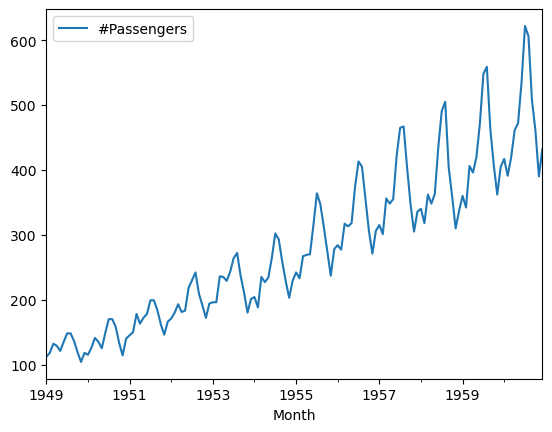

In [14]:
#plotting the time series
data.plot()

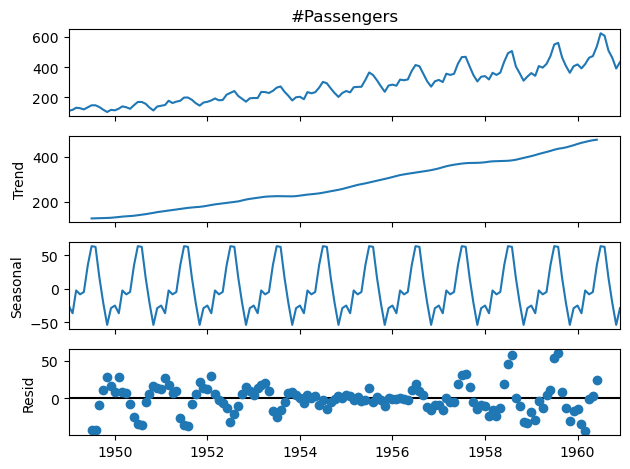

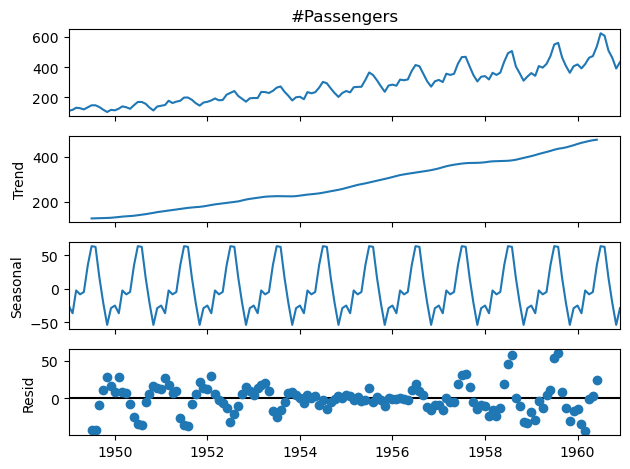

In [15]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(data['#Passengers'].dropna())
decompose_result.plot()

In [16]:
# to get rolling mean
mean_log = data.rolling(window=12).mean()

Text(0.5, 1.0, 'Rolling Mean ')

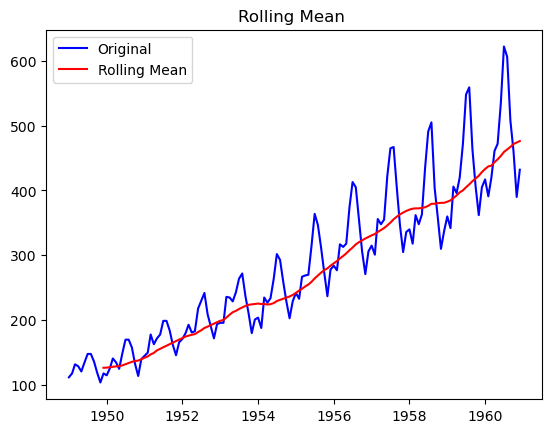

In [17]:

plt.plot(data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean ')

Before building a time series model, we need to make sure that the time series is stationary. If the time series is non-stationary, then we need to make it stationary by differencing the data. The number of times we take a difference of the data is a parameter used in ARIMA models.

Non-stationarity in time series may appear for the following reasons:

Presence of a trend in the data
Presence of heteroskedasticity
Presence of autocorrelation
We can identify non-stationarity in the time series by performing a statistical test called the Augmented Dicky-Fuller Test.

Null Hypothesis: The time series is non stationary
Alternate Hypothesis: The time series is stationary

In [18]:
# If p value less than 0.05 then time series is stationary

In [19]:
#checking the stationarity of the series
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['#Passengers'])
print(result[1])

0.9918802434376411


In [20]:
# differencing the data by using diff() which will subtract present input-pervious input
data['#Passengers'].diff().dropna()

Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, Length: 143, dtype: float64

In [21]:
data['#Passengers'].head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [22]:
# again checking p value
result = adfuller(data['#Passengers'].diff().dropna())
result[1]

0.0542132902838265

<Axes: xlabel='Month'>

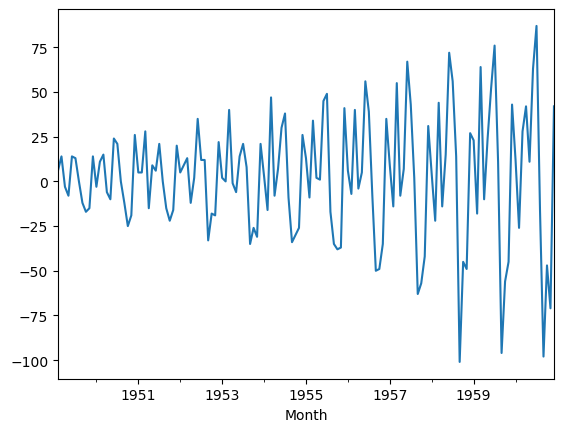

In [23]:
data['#Passengers'].diff().dropna().plot()

In [24]:
new_data = pd.DataFrame(data['#Passengers'].diff().dropna())

In [25]:
mean_log = new_data.rolling(window=12).mean()

Text(0.5, 1.0, 'Rolling Mean ')

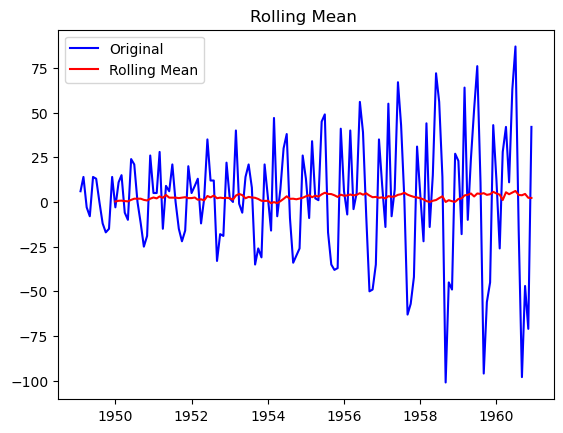

In [26]:
# ploting new_data vs mean_log
plt.plot(new_data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean ')

In [27]:
new_data

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


If p value < 0.05 then time series is stationary else not stationary

In [28]:
#adfuller test for stationarity
result = adfuller(new_data['#Passengers'])
print(result[1])

0.0542132902838265


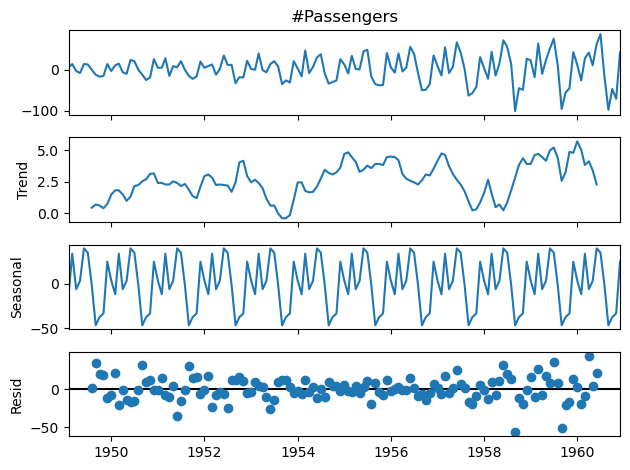

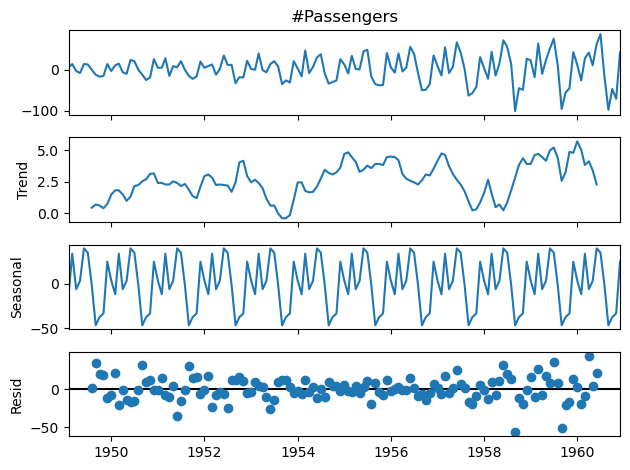

In [29]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(new_data['#Passengers'].dropna())

decompose_result.plot()

In [30]:
# importing Arima library
from statsmodels.tsa.arima.model import ARIMA

#splitting data into training and testing
train = new_data.iloc[:120]['#Passengers']
test = new_data.iloc[121:]['#Passengers']

model = ARIMA(train, order=(1,0,2)) #p=1,d=0,q=2
model_fit = model.fit()
# model_fit.summary()

C:\Users\shiva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shiva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shiva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [31]:
len(train)+len(test)- 1

141

In [32]:
new_data['predict'] = model_fit.predict(start= 2, end=len(train)+len(test)- 1, dynamic=True)
new_data[['#Passengers','predict']]

,#Passengers,predict
Month,,
1949-02-01,6.0,NaN
1949-03-01,14.0,NaN
1949-04-01,-3.0,3.881777
1949-05-01,-8.0,-1.389282
1949-06-01,14.0,0.415301
...,...,...
1960-08-01,-16.0,2.446865
1960-09-01,-98.0,2.446865
1960-10-01,-47.0,2.446865


<Axes: xlabel='Month'>

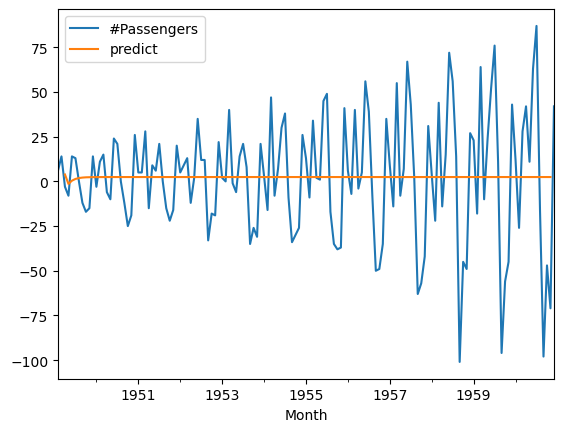

In [33]:
new_data[['#Passengers','predict']].plot()

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(1,0,2), seasonal_order=(1,0,2,12))
model = model.fit()

C:\Users\shiva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shiva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shiva\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\shiva\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [35]:
train['predict'] = model.predict(start= 2 , end=len(train)+len(test)- 1, dynamic=True)

C:\Users\shiva\AppData\Local\Temp\ipykernel_7792\883988673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['predict'] = model.predict(start= 2 , end=len(train)+len(test)- 1, dynamic=True)


<Axes: xlabel='Month'>

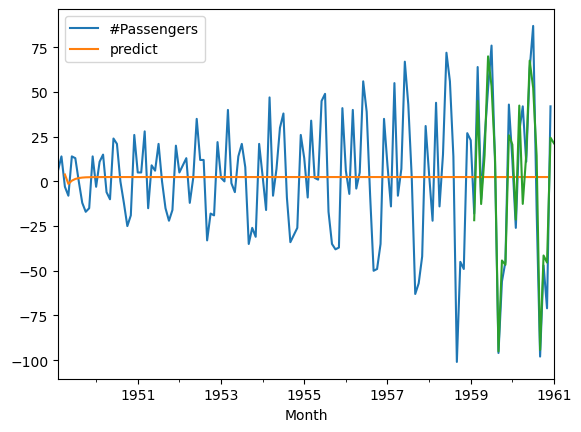

In [36]:
#predicting the projections for the next 5 years
forecast = model.forecast(steps=24)
new_data.plot()
forecast.plot()

In [37]:
# calculating mean squared error 
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
predict_df = new_data[121:141]
mean_squared_error(predict_df['#Passengers'],predict_df['predict'])

2811.6194575920535

In [38]:
mean_absolute_percentage_error(predict_df['#Passengers'],predict_df['predict'])

0.9777285783604006

In [39]:
# splitting the data into training and testing set
train = data.iloc[:120]['#Passengers']
test = data.iloc[121:]['#Passengers']

#fitting sarimax model
model = SARIMAX(train, order=(1,1,2), seasonal_order=(1,1,2,12))
model = model.fit()

C:\Users\shiva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shiva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


C:\Users\shiva\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: xlabel='Month'>

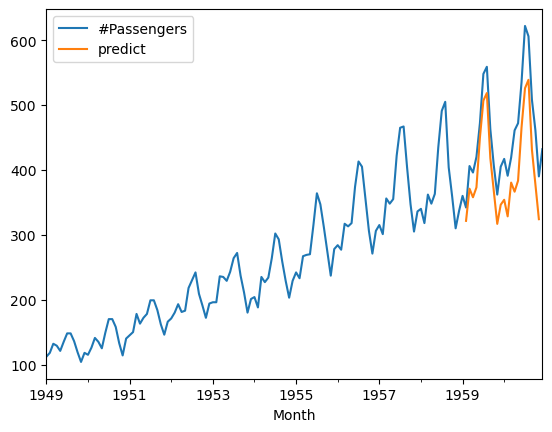

In [40]:
data['predict'] = model.predict(start= 121 , end=len(train)+len(test)- 1, dynamic=True)
data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

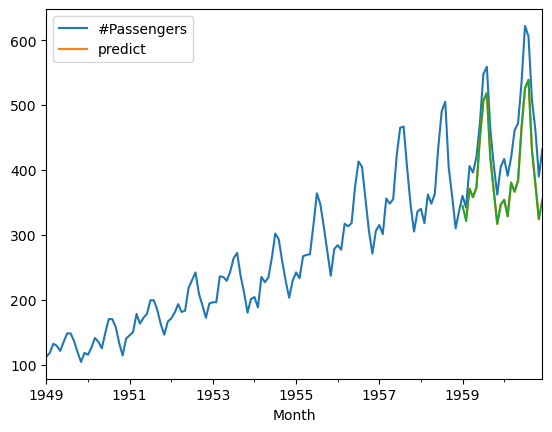

In [41]:
#predicting the projections for the next 5 years
forecast = model.forecast(steps=24)
data.plot()
forecast.plot()

In [42]:
The End

SyntaxError: invalid syntax (3609475833.py, line 1)